In [1]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import colorsys
import math
import os

os.chdir("..")

### Create visuals

1. Mandelbrot set generation

2. Julia Set Generation

3. Trajectory (orbits) of sequences in the mandlebrot set

In [ ]:
width = 1000 #pixels
x = -0.65
y = 0
precision = 500

#### Code taken/inspired from https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f
#### https://github.com/blakesanie/Mandelbrot-Set

# Code has been modified

def mandelbrot_image(width = 1000,x=-0.65,y=0,precision=500,file ='images'):

    #frame parameters
    xRange = 3.4
    aspectRatio = 4/3

    height = round(width / aspectRatio)
    yRange = xRange / aspectRatio
    minX = x - xRange / 2
    # maxX = x + xRange / 2
    maxY = y + yRange / 2
    # minY = y - yRange / 2
    # print(minX,maxX,minY,maxY)

    img = Image.new('RGB', (width, height), color = 'black')
    pixels = img.load()

    for row in range(height):
        for col in range(width):
            # Pixel location defines constant for mandelbrot sequence
            c_real = minX + col * xRange / width # pixel location x
            c_imag = maxY - row * yRange / height # pixel location y

            # Recursive function is initilized at 0
            x = 0
            y = 0 
            
            for i in range(precision + 1):
                a = x*x - y*y #real component of z^2
                b = 2 * x * y #imaginary component of z^2
                x = a + c_real #real component of new z
                y = b + c_imag #imaginary component of new z
                if x*x + y*y > 4:
                    break

            if i < precision:
                distance = (i + 1) / (precision + 1)
                # rgb = colorsys.hsv_to_rgb(0.6+3*distance**0.3,1-0.7*distance**0.2,0.8)
                rgb = colorsys.hsv_to_rgb(0.6+3*distance**0.25,1-0.7*distance**0.2,0.8)
                rgb = tuple(round(i * 255) for i in rgb)
                pixels[col,row] = rgb
            # index = row * width + col + 1

    img.save(os.path.join(file,'Mandelbrot.png'))

In [ ]:
mandelbrot_image()

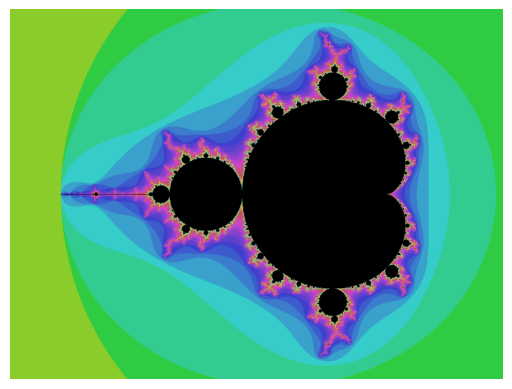

In [2]:
img = plt.imread('images/Mandelbrot.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
#### Code taken from https://medium.com/swlh/visualizing-the-mandelbrot-set-using-python-50-lines-f6aa5a05cf0f
#### https://github.com/blakesanie/Mandelbrot-Set

# The code been modified to calculate julia sets belonging to the mandelbrot family

def julia_set_image(C,width = 1000,x=0,y=0,precision=500,file ='images',bw=False):

    #frame parameters
    xRange = 3.4
    aspectRatio = 4/3

    height = round(width / aspectRatio)
    yRange = xRange / aspectRatio
    minX = x - xRange / 2
    maxY = y + yRange / 2

    img = Image.new('RGB', (width, height), color = 'black')
    pixels = img.load()

    for row in range(height):
        for col in range(width):
            # Pixel location defines where function is initilized for a Julia Set
            x = minX + col * xRange / width # pixel location x
            y = maxY - row * yRange / height # pixel location y
            
            for i in range(precision + 1):
                a = x*x - y*y #real component of z^2
                b = 2 * x * y #imaginary component of z^2
                x = a + np.real(C) #real component of new z
                y = b + np.imag(C) #imaginary component of new z
                if x*x + y*y > 4:
                    break

            if i < precision:
                if bw == False:
                    distance = (i + 1) / (precision + 1)
                    # rgb = colorsys.hsv_to_rgb(0.6+3*distance**0.3,1-0.7*distance**0.2,0.8)
                    rgb = colorsys.hsv_to_rgb(0.6+3*distance**0.25,1-0.7*distance**0.2,0.8)
                else:
                    rgb = colorsys.hsv_to_rgb(1,0,1)
                    
                rgb = tuple(round(i * 255) for i in rgb)
                pixels[col,row] = rgb
               
    img.save(os.path.join(file,'Julia Set {}.png'.format(C)))

In [ ]:
c = complex(0,0)
julia_set_image(c)

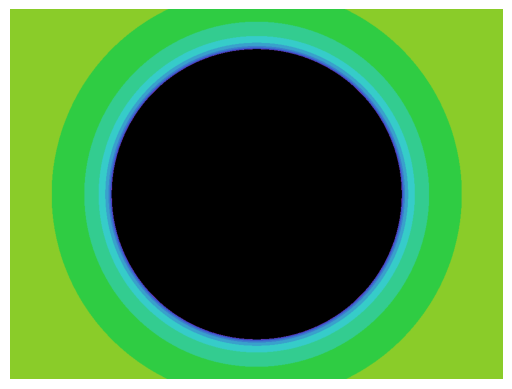

In [3]:
img = plt.imread('images/Julia Set 0j.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

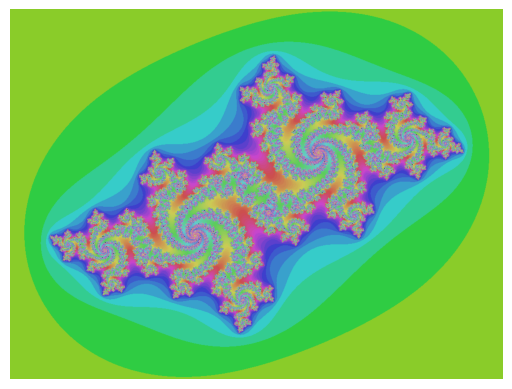

In [4]:
img = plt.imread('images/Julia Set (-0.5251993-0.5251993j).png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
def mandelbrot_func(c,x):
    # interation function (discrete update)
    return np.square(x) + c

def mandelbrot_path(c,n,x):
    # iterate through function
    x_ar = [x]

    for i in range(n):
        x = mandelbrot_func(c,x)
        x_ar.append(x)
        
    return x_ar

In [ ]:
def mandelbrot_path_plot(c,n,x,file='images'):
    # calculate paths for initial value x
    for i in x:
        x_ar = mandelbrot_path(c,n,i)
        plt.plot(np.real(x_ar),np.imag(x_ar),'o-',label = str(i))

    if np.linalg.norm(c)==0:
        t = np.linspace(0,2*np.pi,100)
        plt.plot(np.cos(t), np.sin(t), 'k-',alpha = 0.3,label='Unit Circle')
        
    plt.scatter(np.real(x),np.imag(x),marker='x',color='k')
    plt.legend(loc='best')
    # plt.xlim(-2,2)
    # plt.ylim(-2,2)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.savefig(os.path.join(file,"Mandelbrot Path C = {}.png".format(c)))

In [ ]:
n = 100
c = complex(-0.507,0.54)
x = [0]
mandelbrot_path_plot(c,n,x,file='images')

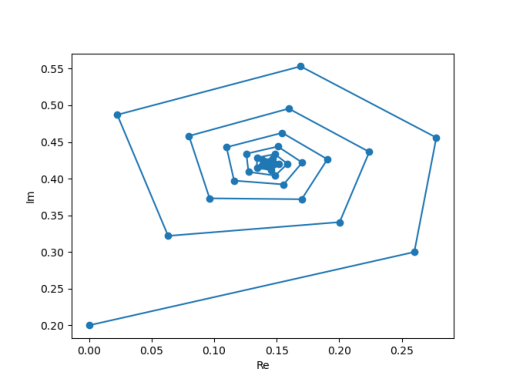

In [5]:
img = plt.imread('images/trajectories for convergence C = (0.3+0.3j) test.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

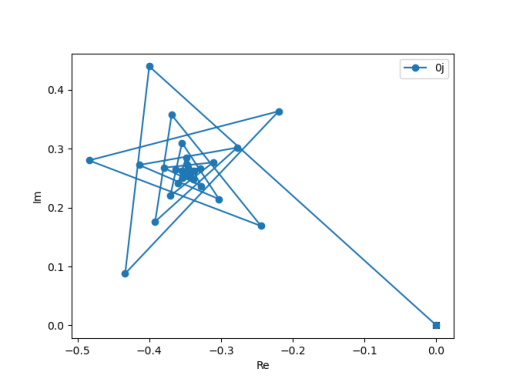

In [6]:
img = plt.imread('images/trajectories for convergence C = (-0.4+0.44j).png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()